### 데이콘 Basic 자동차 가격 예측 AI 경진대회

- https://dacon.io/competitions/official/236114/overview/description

-  2023.06.12 ~ 2023.06.26 10:00

- 자동차 가격을 예측하는 AI 알고리즘 개발

  - 자동차 생산년도, 브랜드, 종류 등 자동차와 관련된 데이터를 활용하여 자동차 가격을 예측하는 AI 모델을 개발


#### 라이브러리 정의

In [9]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
#한글 폰트 사용을 위해
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

#### 데이터 불러오기

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

display(train.head(), test.head())

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG)
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0


#### 기본 정보 확인

In [3]:
display(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 14 columns):
 #   C

None

None

In [4]:
display(train.isna().sum(), test.isna().sum())

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
dtype: int64

In [5]:
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [19]:
train['브랜드'].value_counts()

opel             6651
ford             5819
volkswagen       5693
audi             5597
bmw              5262
renault          3853
toyota           3259
skoda            3130
mercedes-benz    2899
nissan           2129
kia              2034
hyundai          1855
seat             1628
mazda            1572
honda            1545
volvo            1352
fiat             1164
citroen          1129
peugeot           793
mitsubishi        556
Name: 브랜드, dtype: int64

In [23]:
train['차량모델명'].value_counts()

astra        2537
a4           2082
seria-3      1998
golf         1910
focus        1647
             ... 
omega          17
frontera       14
s3              7
gle-klasa       2
g-klasa         1
Name: 차량모델명, Length: 143, dtype: int64

In [21]:
train['판매도시'].value_counts()

WAR    3245
KRA    1241
WRO    1166
LOD    1141
POZ     987
       ... 
MVH       1
CIB       1
CED       1
FNQ       1
ZDZ       1
Name: 판매도시, Length: 3224, dtype: int64

In [22]:
train['판매구역'].value_counts()

MAZ    10846
SLA     7655
WIE     6910
MAL     4746
DOL     4603
LOD     3581
POM     3517
KUJ     2628
LUB     2598
ZAC     2078
POD     1849
SWI     1789
WAR     1569
LUU     1427
POL     1066
OPO     1041
MOR       17
Name: 판매구역, dtype: int64

In [25]:
train['판매구역'].nunique()
#라벨 인코딩 가능

17

In [31]:
display(train['압축천연가스(CNG)'].value_counts(),
        train['경유'].value_counts(),
        train['가솔린'].value_counts(),
        train['하이브리드'].value_counts(),
        train['액화석유가스(LPG)'].value_counts())

0    57892
1       28
Name: 압축천연가스(CNG), dtype: int64

0    33290
1    24630
Name: 경유, dtype: int64

1    30000
0    27920
Name: 가솔린, dtype: int64

0    57324
1      596
Name: 하이브리드, dtype: int64

0    55254
1     2666
Name: 액화석유가스(LPG), dtype: int64

#### 간단 EDA

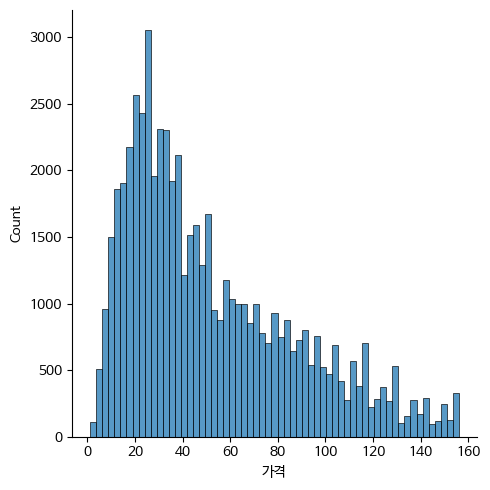

In [16]:
#타겟값인 가격 칼럼 시각화
sns.displot(train['가격'])
plt.show()

<Axes: >

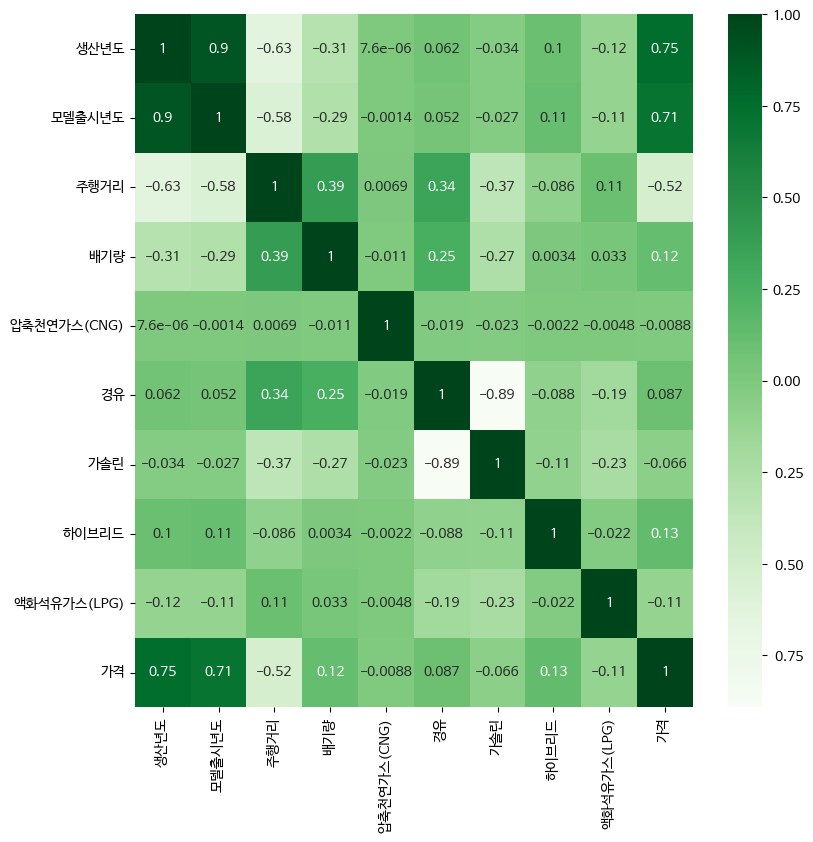

In [10]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(9,9))
sns.heatmap(data=train.corr(), annot=True, cmap='Greens')

타겟값인 '가격'과 상관성이 높은 피처는 '생산년도'랑 '모델출시년도'

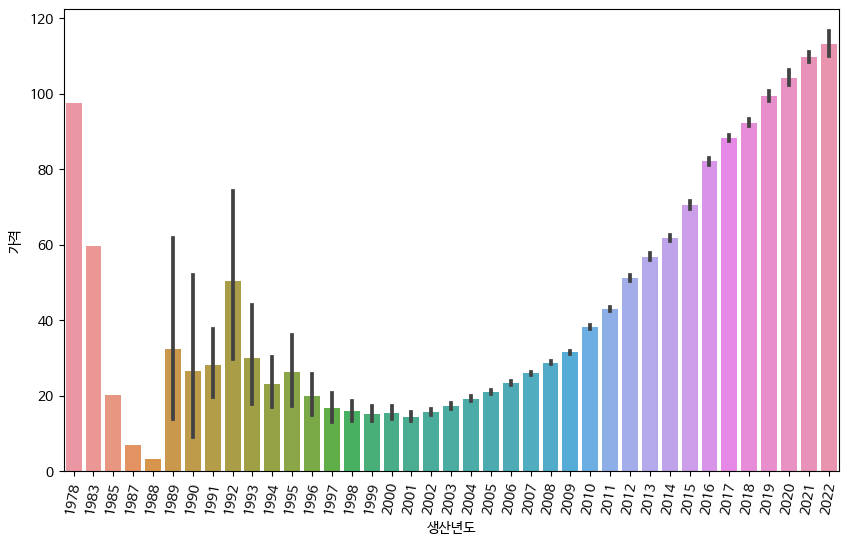

In [14]:
#생산년도별 평균 가격 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=train, x='생산년도', y='가격')
plt.xticks(rotation=80)
plt.show()

대체로 생산년도가 최근일수록 가격이 비쌈

그러나 과거임에도 가격이 높거나 눈에 띄게 평균 가격이 낮은 1978년도, 1983년도, 1987년도, 1988년도 데이터는 좀 더 살펴보기

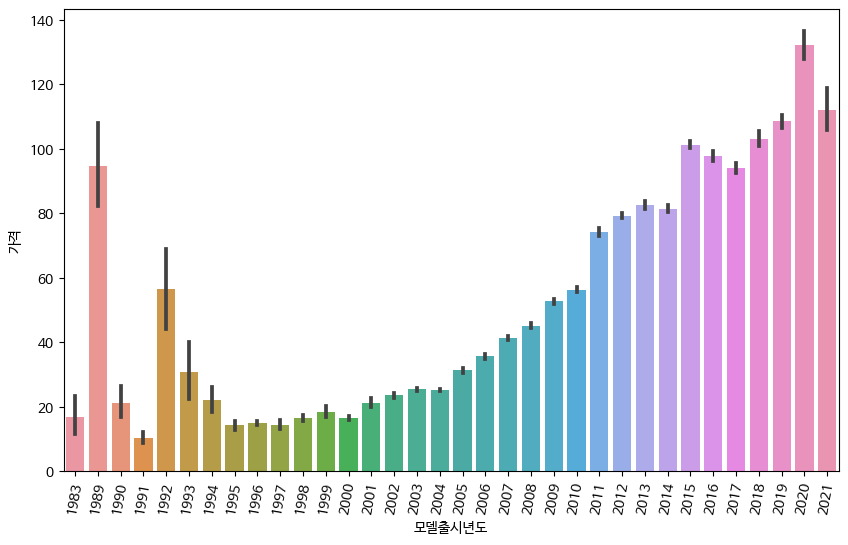

In [15]:
#모델출시년도별 평균 가격 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=train, x='모델출시년도', y='가격')
plt.xticks(rotation=80)
plt.show()

대체로 출시년도가 최근일수록 가격이 높음

그러나, 과거임에도 가격이 높거나 평균 가격이 매우 낮게 나오는 1989년도, 1991년도, 1992년도 데이터는 좀 더 살펴보기

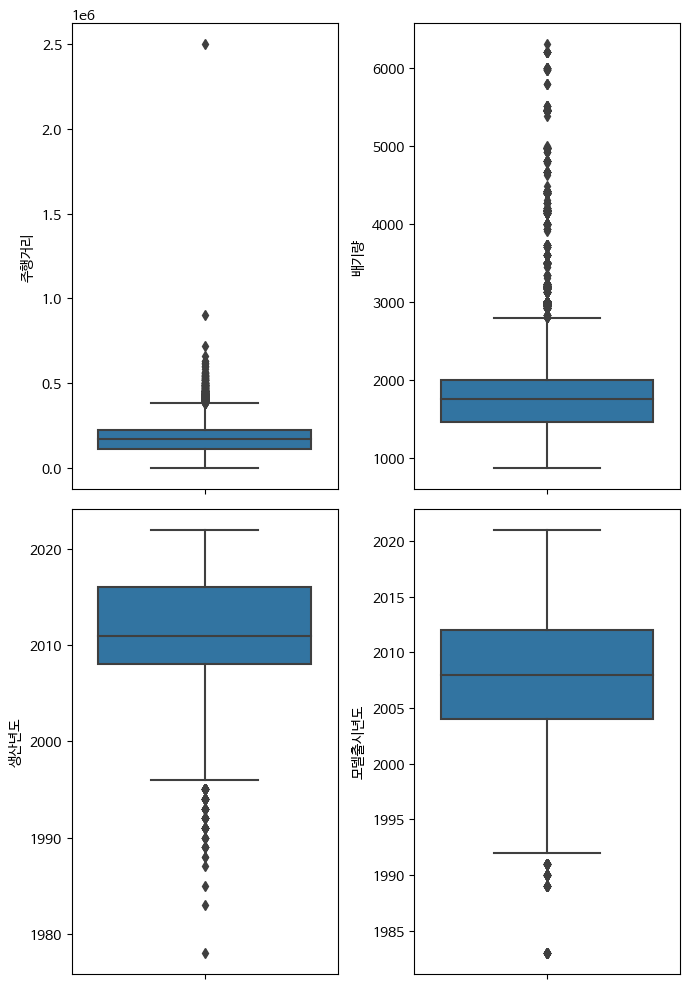

In [33]:
#이상치 확인
fig, axes = plt.subplots(2,2, figsize = (7,10))

sns.boxplot(y = train['주행거리'], ax = axes[0][0])
sns.boxplot(y = train['배기량'], ax = axes[0][1])

sns.boxplot(y = train['생산년도'], ax = axes[1][0])
sns.boxplot(y = train['모델출시년도'], ax = axes[1][1])

plt.tight_layout()
plt.show()

#### 전처리

자동차 종류 칼럼을 만들어서 압축천연:0, 경유:1 ~ 액화석유:4 이런 식으로 합치고싶음

판매구역은 라벨인코딩 진행

주행거리, 배기량 칼럼에서의 이상치 제거 혹은 평균값으로 대체

피처 칼럼들 로그 변환..?

종속변수, 독립변수 분리

필요없는 칼럼 드랍




#### 모델링

모델 선정

SuffleSplit랑 그리드 서치로 최적 하이퍼 파라미터 찾고 저장(수행 시간도 재보기)

학습 및 예측 >> 단독 모델 or 앙상블.. 교차검증해서 점수 내보기

최종 예측값 submission에 넣기

피처 중요도 시각화해보기